### WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls

In [3]:
def get_weather_json(city, api_key):
    
    url = "http://api.openweathermap.org/data/2.5/weather?units=imperial"
    r = requests.get(url, params={
        "appid": api_key,
        "q": city})
    if r.status_code == 200:
        r_json = r.json()
        return r_json
    else:
        return None

In [5]:
count = 0
out_cities = []

for city in cities:
    out_city = get_weather_json(city, api_key)
    if out_city:
        out_cities.append(out_city)
        count += 1
        print(f'Processing Record {str(count)} for {out_city["name"]}')
    else:
        print("City not found. Skipping City...")

Processing Record  1 for Hobart
Processing Record  2 for Puerto Ayora
Processing Record  3 for Hilo
Processing Record  4 for Dudinka
Processing Record  5 for Butaritari
Processing Record  6 for Ushtobe
Processing Record  7 for Saint-Philippe
Processing Record  8 for Hithadhoo
Processing Record  9 for Staraya Toropa
City not found. Skipping City...
Processing Record  10 for Yumen
Processing Record  11 for Port Augusta
City not found. Skipping City...
Processing Record  12 for Bredasdorp
Processing Record  13 for Bluff
Processing Record  14 for Kaitangata
Processing Record  15 for Tual
Processing Record  16 for Mount Isa
City not found. Skipping City...
Processing Record  17 for Burnie
Processing Record  18 for Manakara
Processing Record  19 for Kodiak
Processing Record  20 for Faanui
Processing Record  21 for Kapaa
Processing Record  22 for Barrow
Processing Record  23 for Mataura
Processing Record  24 for Airai
Processing Record  25 for Cabo San Lucas
Processing Record  26 for Asyut
Pr

### Convert Raw Data to Dataframe

In [6]:
df = pd.DataFrame(out_cities)

In [16]:
clean_out_cities = [{
    "City Name": d["name"],
    "Country": d["sys"]["country"],
    "Cloudiness (%)": d["clouds"]["all"],
    "Humidity (%)": d["main"]["humidity"],
    "Temperature (F)": d["main"]["temp"],
    "Wind Speed (mph)": d["wind"]["speed"],
    "Latitude": d["coord"]["lat"],
    "Longitude": d["coord"]["lon"]
} for d in out_cities]

In [17]:
weather_df = pd.DataFrame(clean_out_cities)

#output to CSV
weather_df.to_csv("weather.csv", index= False)

In [9]:
weather_df

,City Name,Country,Cloudiness (%),Humidity (%),Temperature (F),Wind Speed (mph),Latitude,Longitude
0,Hobart,AU,75,68,66.94,12.75,-42.88,147.33
1,Puerto Ayora,EC,75,65,79.36,12.75,-0.74,-90.35
2,Hilo,US,90,57,74.75,6.93,19.71,-155.08
3,Dudinka,RU,92,92,12.20,20.13,69.41,86.18
4,Butaritari,KI,100,76,84.87,18.25,3.07,172.79
...,...,...,...,...,...,...,...,...
550,Aberdeen,US,90,100,50.95,20.80,46.98,-123.82
551,Balgazyn,RU,26,89,-8.61,0.65,51.00,95.20
552,Mitu,IR,0,84,19.09,2.89,36.20,46.09
553,Inhambane,MZ,29,77,79.43,12.15,-23.87,35.38


### Temperature (F) vs. Latitude Scatter Plot

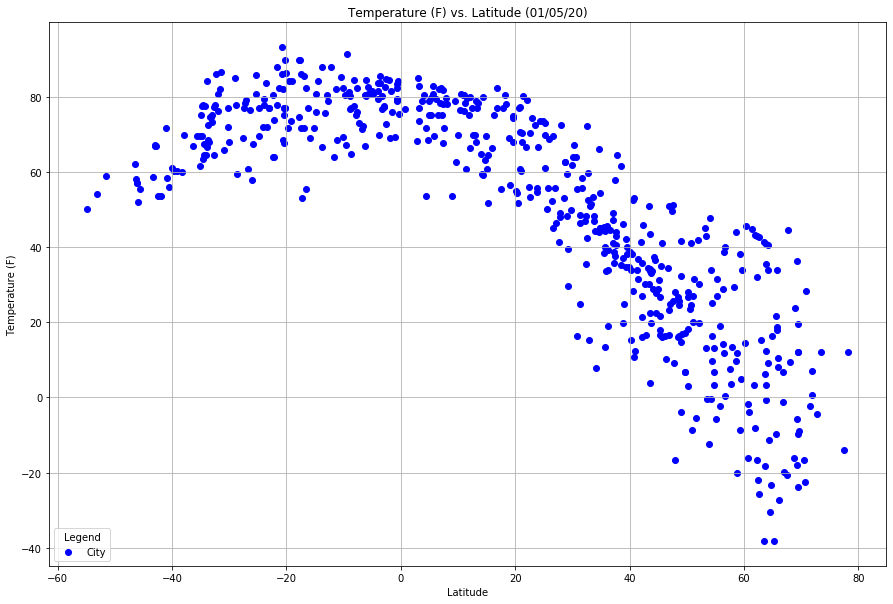

In [10]:
plt.figure(figsize = (15,10))

plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"], color= "#0000ff", label= "City")

plt.grid()
plt.legend(title= "Legend", loc= "lower left")
plt.title("Temperature (F) vs. Latitude (01/05/20)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
           
plt.savefig("Temperature vs Latitude.png")
plt.show()

plt.close()

### Humidity (%) vs. Latitude Scatter Plot

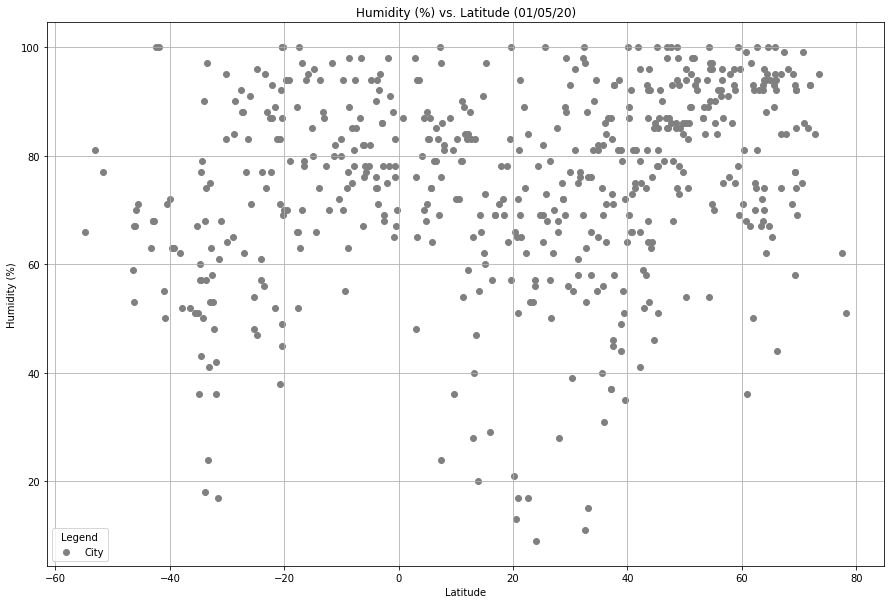

In [11]:
plt.figure(figsize = (15,10))

plt.scatter(weather_df["Latitude"], weather_df["Humidity (%)"], color= "#808080", label= "City")

plt.grid()
plt.legend(title= "Legend", loc= "lower left")
plt.title("Humidity (%) vs. Latitude (01/05/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
           
plt.savefig("Humidity vs Latitude.png")
plt.show()

plt.close()

### Cloudiness (%) vs. Latitude Scatter Plot

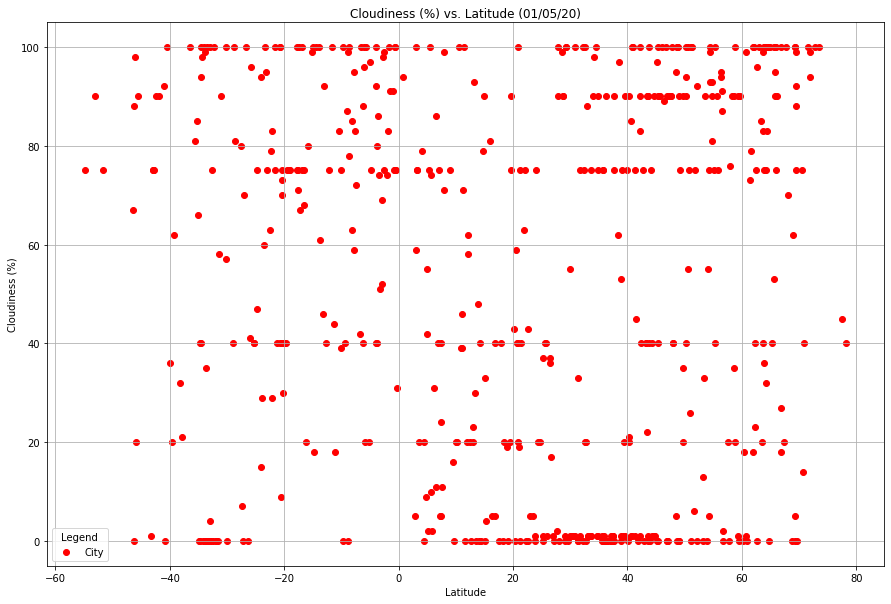

In [12]:
plt.figure(figsize = (15,10))

plt.scatter(weather_df["Latitude"], weather_df["Cloudiness (%)"], color= "#ff0000", label= "City")

plt.grid()
plt.legend(title= "Legend", loc= "lower left")
plt.title("Cloudiness (%) vs. Latitude (01/05/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
           
plt.savefig("Cloudiness vs Latitude.png")
plt.show()

plt.close()

### Wind Speed (mph) vs. Latitude Scatter Plot

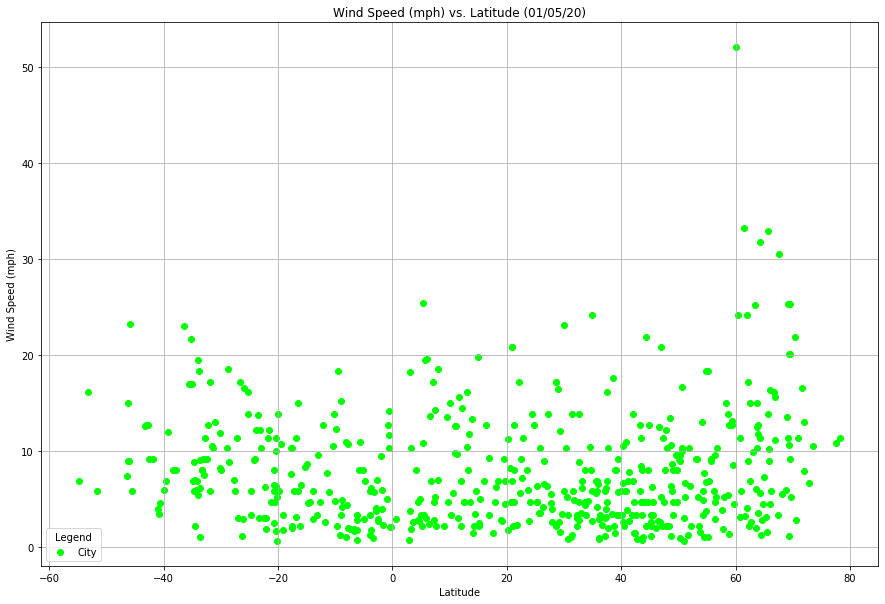

In [13]:
plt.figure(figsize = (15,10))

plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"], color= "#00ff00", label= "City")

plt.grid()
plt.legend(title= "Legend", loc= "lower left")
plt.title("Wind Speed (mph) vs. Latitude (01/05/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
           
plt.savefig("Wind Speed vs Latitude.png")
plt.show()

plt.close()

### Three Observations
1. Based on observations from the Temperature (F) vs. Latitude scatter plot, the majority of cities closer to the equator (0 latitude) experience higher temperatures than cities further away from the equator.
2. The majority of the cities plotted on the Humidity (%) vs. Latitude scatter plot, experience over 60% humidity. More cities with a positive latitude seem to experience a higher humidiity percentage even as the cities get furthrer from the equator. Higher humidity percentages can mean the temperature outside feels hotter than it actually is. Even those some of these cities experience temperatures cooler than cities closer to the equator, the weather could feel warmer than the temperature implies with the high humidity.
3. The wind speeds seems to slightly increase as you move away from the equator. The increase seems a bit greater for ciites closer to the North Pole than the South Pole. 